In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
df = pd.read_csv('/Users/Koh/Documents/2017-_SNU/Research/DM/data/ML/Bestseller_Children.csv', encoding='cp949')

In [2]:
df

,BestsellerChildren,Genre,GenreBin,Title,Author,Published Year,Publisher,Page,Price,authorgender(male0fe1team2),isFirstBestSeller,Duration,변경전Duration,변경후Duration3(0=S1=L2=etc),Impact,year_rank,isGlobal50 of first year(False=0True=1)
0,2020,Children'sBooks,3,School Zone - Big Preschool Workbook - Ages 4…,School Zone,2018,School Zone Publishing,320,12.99,2,1,3,1,1,1.397000e+08,2019_09,0
1,2020,Children'sBooks,3,If Animals Kissed Good Night,Ann Whitford Paul,2014,Farrar Straus and Giroux,34,7.99,1,1,4,1,1,1.562000e+04,2019_24,1
2,2020,Children'sBooks,3,The Very Hungry Caterpillar,Eric Carle,1981,World of Eric Carle,32,21.99,0,0,8,1,1,1.386000e+05,2019_16,1
3,2020,Children'sBooks,3,Giraffes Can't Dance,Giles Andreae,2012,Cartwheel Books,32,16.99,0,1,7,1,1,5.403860e+03,2019_23,1
4,2020,Children'sBooks,3,Brown Bear Brown Bear What Do You See?,Bill Martin Jr. and Eric Carle,2020,Henry Holt and Co. (BYR),24,8.99,0,0,6,1,1,7.037929e+03,2019_48,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2012,Children'sBooks,3,LEGO NINJAGO: Character Encyclopedia,DK,2016,DK Children,224,18.99,2,1,1,0,0,6.988100e+07,NaN,1
92,2012,Children'sBooks,3,Cabin Fever (Diary of a Wimpy Kid Book 6),Jeff Kinney,2011,Harry N. Abrams,224,14.99,0,0,2,0,1,6.000000e+04,NaN,1
93,2011,Children'sBooks,3,Every Thing On It,Shel Silverstein,2011,HarperCollins,208,7.30,0,1,1,0,0,1.700000e+04,NaN,1
94,2011,Children'sBooks,3,Guinness World Records 2012,Guinness World Records,2011,Guinness World Records,288,28.95,2,1,1,0,0,2.090000e+05,NaN,0


In [3]:
df_x = df[['Published Year', 'Page', 'Price','authorgender(male0fe1team2)', 'isFirstBestSeller','Impact', 'isGlobal50 of first year(False=0True=1)']]
df_y = df['변경후Duration3(0=S1=L2=etc)']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state = 100)

In [5]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train[:] = np.nan_to_num(x_train)
y_train[:] = np.nan_to_num(y_train)

In [6]:
NB = BernoulliNB()
NB.fit(df_x, df_y)

BernoulliNB()

In [7]:
#x_test = pd.read_csv('C:/Users/GC/Desktop/2020/2학기 수업/데이터마이닝(조성준 교수님)/프로젝트/Naive_Valid2.csv', encoding='mac_roman')
y_pred = NB.predict(x_test)

In [8]:
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [9]:
y_test

81    1
73    0
26    0
29    1
43    0
80    0
35    0
44    0
22    1
64    1
5     1
32    0
11    1
56    0
28    0
78    0
36    0
74    1
83    1
82    0
Name: 변경후Duration3(0=S1=L2=etc), dtype: int64

In [10]:
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])

In [11]:
conf_matrix

,pred_0,pred_1
true_0,9,3
true_1,5,3


In [12]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

In [13]:
NB.predict_proba(x_test)

array([[0.58079474, 0.41920526],
       [0.58453007, 0.41546993],
       [0.48740384, 0.51259616],
       [0.49913938, 0.50086062],
       [0.47000853, 0.52999147],
       [0.58572819, 0.41427181],
       [0.58572819, 0.41427181],
       [0.70336885, 0.29663115],
       [0.70336885, 0.29663115],
       [0.47000853, 0.52999147],
       [0.50421349, 0.49578651],
       [0.49000894, 0.50999106],
       [0.42247417, 0.57752583],
       [0.7065638 , 0.2934362 ],
       [0.53928903, 0.46071097],
       [0.7065638 , 0.2934362 ],
       [0.70336885, 0.29663115],
       [0.58572819, 0.41427181],
       [0.50421349, 0.49578651],
       [0.58199592, 0.41800408]])

ROC AUC: 0.688


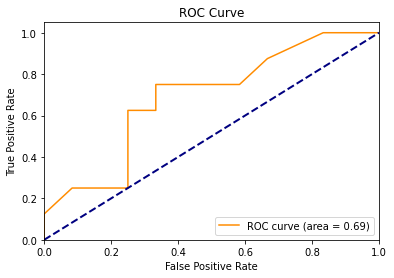

In [14]:
fpr, tpr, _ = roc_curve(y_test, NB.predict_proba(x_test)[:,1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.3f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [15]:
fpr

array([0.        , 0.        , 0.08333333, 0.25      , 0.25      ,
       0.25      , 0.33333333, 0.33333333, 0.58333333, 0.66666667,
       0.83333333, 1.        ])

In [16]:
tpr

array([0.   , 0.125, 0.25 , 0.25 , 0.375, 0.625, 0.625, 0.75 , 0.75 ,
       0.875, 1.   , 1.   ])

In [17]:
predictions1 = NB.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f'Accuracy: {accuracy_score(y_test, predictions1):0.3f}')
print(f'Precision: {precision_score(y_test, predictions1):0.3f}')
print(f'Recall: {recall_score(y_test, predictions1):0.3f}')
print(f'f1: {f1_score(y_test, predictions1):0.3f}')

Accuracy: 0.600
Precision: 0.500
Recall: 0.375
f1: 0.429
